In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [3]:
import random

def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    # ***************************************************************************************************
    result=[]
    
    for i in range(k):
        to_shuffle = [i for i in range(len(data))]
        random.shuffle(to_shuffle)
        result.append(data[to_shuffle[0]])
    
    return np.array(result)

In [4]:
initialize_clusters(data, 2)

array([[  1.817,  46.   ],
       [  2.167,  48.   ]])

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [5]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: build distance matrix
    # ***************************************************
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
    return np.matrix(distance_list).T

build_distance_matrix(np.array([[1,1],[2,2]]), np.array([[0,0],[1,1]]))

matrix([[2, 0],
        [8, 2]])

#### Update k-means parameters

In [6]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    # ***************************************************
    dist_matrix_trans = build_distance_matrix(data, mu_old)
    
    z = []
    l = 0
    for d in dist_matrix_trans:
        #min_ = 10000
        #idx = 0
        #dist = 0
        #for j in range(len(dist_matrix_trans[i])):
        #    print(np.shape(dist_matrix_trans[i]))
        #    print(np.shape(dist_matrix_trans[i][j]))
        #    if(dist_matrix_trans[i][j] < min_):
        #        min_ = dist_matrix_trans[i][j]
        #        idx = j
        #        dist = j*dist_matrix_trans[i][j]
        idx = np.argmin(d)
        z.append(idx)
        l = l + d[0,idx]
        
    
        
    count_z = {x:z.count(x) for x in z} 
            
    mu = np.zeros((len(count_z.keys()),len(data[0]))) #(len(dist_matrix_trans.T),(len(dist_matrix_trans)))
    
    for i,x in enumerate(data):
        idx = z[i]
        count_x = count_z[idx]
        mu[idx] += (x / count_x)
    return l, z, mu

update_kmeans_parameters(np.array([np.array([1,1]),np.array([2,2]),np.array([3,3])]), np.array([[0,0]]))

(28, [0, 0, 0], array([[ 2.,  2.]]))

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 43576.10360599995.


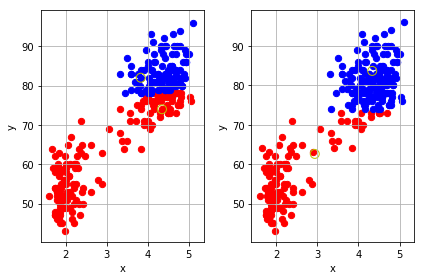

The current iteration of k-means is: 1,                the average loss is 15508.940487650047.


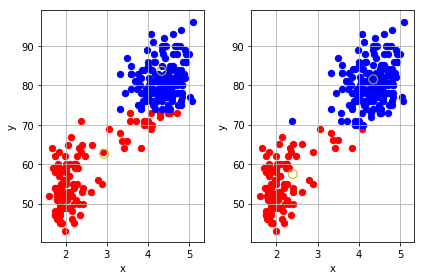

The current iteration of k-means is: 2,                the average loss is 9792.416798094202.


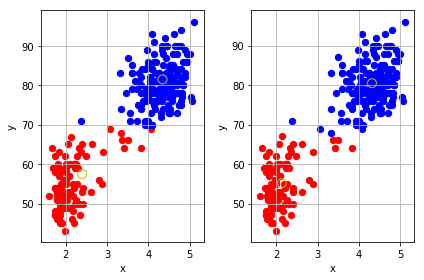

The current iteration of k-means is: 3,                the average loss is 8925.715281184835.


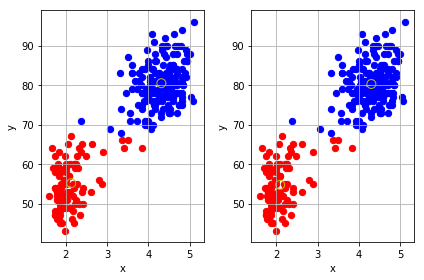

The current iteration of k-means is: 4,                the average loss is 8901.768720947213.


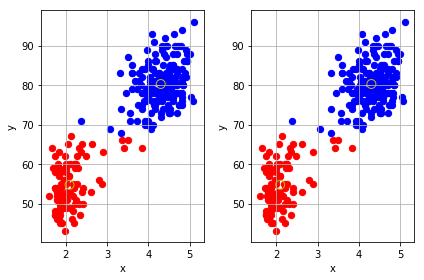

The current iteration of k-means is: 5,                the average loss is 8901.768720947213.


In [7]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [8]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [9]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: vectorize and normalize the original_image.
    # ***************************************************  
    result= np.zeros((np.shape(original_image)[0] * np.shape(original_image)[1], np.shape(original_image)[2]))
    
    print(np.shape(result))
    
    for x in range(len(original_image)):
        len_ = len(original_image[x])
        for y in range(len_):
            result[x*len_+y, 0] = original_image[x][y][0]
            result[x*len_+y, 1] = original_image[x][y][1]
            result[x*len_+y, 2] = original_image[x][y][2]
            #print(x*len_+y)
    
    return result

processed_image = preprocess_image(original_image)

(230400, 3)


In [14]:
import random

def initialize_clusters2(data, k):
    # here we shuffle only one time
    result=[]
    to_shuffle = [i for i in range(len(data))]
    random.shuffle(to_shuffle)
    
    for i in range(k):
        result.append(data[to_shuffle[i]])
        
    return np.array(result)

In [21]:
def update_kmeans_parameters2(data, mu_old):
    dist_matrix_trans = build_distance_matrix(data, mu_old)
    
    z = []
    l = 0
    print("dist")
    for d in dist_matrix_trans:
        idx = np.argmin(d)
        z.append(idx)
        l = l + d[0,idx]
        
    print("count")
    # Prob ici met trop de temps 
    count_z = {x:z.count(x) for x in z}         
    mu = np.zeros((len(count_z.keys()),len(data[0])))
    
    print("mu")
    for i,x in enumerate(data):
        if(i%100 == 0):
            print(i)
        idx = z[i]
        count_x = count_z[idx]
        mu[idx] += (x / count_x)
    return l, z, mu

In [22]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # *************************************************** 
    print(np.shape(processed_image))
    mu_old = initialize_clusters2(processed_image, k)
    print(np.shape(mu_old))
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        print(iter)
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters2(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        #print("The current iteration of k-means is: {i}, the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # update k-means information.
        mu_old = mu

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)
    
# define parameters
k = 5
max_iter = 10
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

(230400, 3)
init
(5, 3)
0
dist
count


KeyboardInterrupt: 